# Assignment Week 3 - Group 5

### Noelani Roy

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix #creates confusion matrix
from sklearn.metrics import plot_confusion_matrix #draws confusion matrix

### Read data

In [3]:
#Read Modified Fraud File defined last week
fraud_df = pd.read_csv('C:/Users/Noela_tm/6000/eai6000_group5/week2/grp5_fraud_mod_one_hot_cats.csv')

### Formatting and cleansing

In [4]:
fraud_df.head()

,Unnamed: 0,txn_datetime,Unnamed: 0.1.1,amt,city_pop,age,distance,hour,day,month,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,2020-06-21 12:14:25,0,2.86,333497,52,24.613746,12,21,6,...,0,0,0,0,0,1,0,0,0,1
1,1,2020-06-21 12:14:33,1,29.84,302,30,104.834043,12,21,6,...,0,0,0,0,0,1,0,0,0,0
2,2,2020-06-21 12:14:53,2,41.28,34496,50,59.204796,12,21,6,...,1,0,0,0,0,0,0,0,0,0
3,3,2020-06-21 12:15:15,3,60.05,54767,33,27.615117,12,21,6,...,0,0,0,0,1,0,0,0,0,1
4,4,2020-06-21 12:15:17,4,3.19,1126,65,104.423175,12,21,6,...,0,0,0,0,0,0,0,0,1,1


In [5]:
# Drop the columns used to derive new features
fraud_df.drop([
    'Unnamed: 0',
    'Unnamed: 0.1',
    'txn_datetime',
    'Target',
    'log_amt',
    'Unnamed: 0.1.1'
], axis=1, errors='ignore', inplace=True)
fraud_df.head()

,amt,city_pop,age,distance,hour,day,month,year,is_fraud,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.86,333497,52,24.613746,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,1
1,29.84,302,30,104.834043,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41.28,34496,50,59.204796,12,21,6,2020,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60.05,54767,33,27.615117,12,21,6,2020,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.19,1126,65,104.423175,12,21,6,2020,0,0,...,0,0,0,0,0,0,0,0,1,1


In [6]:
fraud_df['year'].unique()

array([2020, 2019], dtype=int64)

In [7]:
fraud_df.dtypes

amt                        float64
city_pop                     int64
age                          int64
distance                   float64
hour                         int64
day                          int64
month                        int64
year                         int64
is_fraud                     int64
category_food_dining         int64
category_gas_transport       int64
category_grocery_net         int64
category_grocery_pos         int64
category_health_fitness      int64
category_home                int64
category_kids_pets           int64
category_misc_net            int64
category_misc_pos            int64
category_personal_care       int64
category_shopping_net        int64
category_shopping_pos        int64
category_travel              int64
gender_M                     int64
dtype: object

In [8]:
#Breaking it into two parts, separate the target variable from the other columns
X=fraud_df.drop('is_fraud',axis=1).copy()
X.head()

,amt,city_pop,age,distance,hour,day,month,year,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.86,333497,52,24.613746,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,1
1,29.84,302,30,104.834043,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41.28,34496,50,59.204796,12,21,6,2020,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60.05,54767,33,27.615117,12,21,6,2020,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.19,1126,65,104.423175,12,21,6,2020,0,0,...,0,0,0,0,0,0,0,0,1,1


In [9]:
y=fraud_df['is_fraud'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [10]:
#First, let's observe that this data is imbalanced by dividing the number of fraud, where y=1, by the ottal number in the dataset
sum(y)/len(y)

0.005210014716091717

Here we can see only 0.5% of lines contain fraud, so when we split the data into training and testing, we will split using stratificiation in order to maintain the same percentage of fraud in both the training set and testing set.

### XGBoost

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [12]:
sum(y_train)/len(y_train)

0.005209836643765363

In [13]:
sum(y_test)/len(y_test)

0.005210548932301732

Here I can see that stratify worked as expected and the same level of fraud is contained in both training and testing

In [14]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.79524
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.80650
[2]	validation_0-aucpr:0.80978
[3]	validation_0-aucpr:0.81373
[4]	validation_0-aucpr:0.81850
[5]	validation_0-aucpr:0.83440
[6]	validation_0-aucpr:0.83654
[7]	validation_0-aucpr:0.84063
[8]	validation_0-aucpr:0.85333
[9]	validation_0-aucpr:0.85519
[10]	validation_0-aucpr:0.85875
[11]	validation_0-aucpr:0.86549
[12]	validation_0-aucpr:0.87637
[13]	validation_0-aucpr:0.88355
[14]	validation_0-aucpr:0.88616
[15]	validation_0-aucpr:0.88798
[16]	validation_0-aucpr:0.89601
[17]	validation_0-aucpr:0.90192
[18]	validation_0-aucpr:0.90358
[19]	validation_0-aucpr:0.90487
[20]	validation_0-aucpr:0.90547
[21]	validation_0-aucpr:0.90646
[22]	validation_0-aucpr:0.90766
[23]	validation_0-aucpr:0.91154
[24]	validation_0-aucpr:0.91327
[25]	validation_0-aucpr:0.91396
[26]	validation_0-aucpr:0.91531
[27]	validation_0-aucpr:0.91673
[28]	validation_0-aucpr:0.91779
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

So we built 84 trees for our XGBoost Classification. Now let's see how it performs on the Testing Dataset by running hte Testing Dataset down the model and drawing a confusion matrix

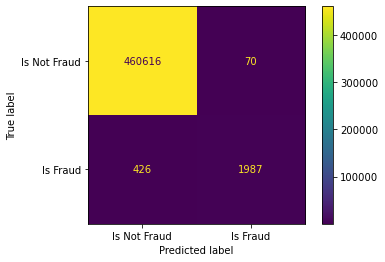

In [15]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Is Not Fraud","Is Fraud"])

In the confusion matrix, we see that of the 460686 not fraud cases, 460616 of them were properly classified (99.98%). Of the 2413 cases of fraud, 1987 of them were correctly classified as fraud (82.34%). Part of the reason this number is not higher is because the dataset is imbalanced. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data. So let's try to improve predictions using Cross Validation to optimize the parameters. 

### Optimize Parameters using Cross Validation and GridSearch()

XGBoost has a lot of hyperparamers, parameters that we have to manually configure and are not determined by XGBoost itself, including max_depth, the maximum tree depth, learning_rate, the learning rate, or "eta", gamma, the parameter that encourages pruning, and reg_lambda, the regularization parameter lambda. So let's try to find the optimal values for these hyperparameters in hopes that we can improve the accuracy with the Testing Dataset.

Since we have many hyperparameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for the hyperparameters and GridSearchCV() test all possible combinations of the parameter for us.

The XGBoost manual says, if you only care about the overeall performance metric (AUX) of your prediction, then balance the positive and negative weights via scale_pos_weight and use the AUC to evaluate how good of a fit you have. 

In [16]:
#### Round 1
# param_grid={
#    'max_depth':[3,4,5],
#    'learning_rate':[0.1,0.01,0.05],
#    'gamma':[0,0.25,1.0],
#    'reg_lambda': [0,1.0,10.0],
#    'scale_pos_weight':[1,3,5] 
# }
# Round2
# param_grid={
#      'max_depth':[3,4,5],#this gives three options for how many levels of branching our tree can have
#    'learning_rate':[0.1,0.01,0.05],
#    'gamma':[0,0.25,1.0],tunnin
#    'reg_lambda': [0,1.0,10.0],
#    'scale_pos_weight':[1,3,5] #KGBoot recommends sum(negative instances)/sum(positive instances)
# }
# optimal_params=GridSearchCV(
#    estimator=xgb.XGBClassifier(objective='binary:logistic',
#                              seed=42,
#                              subsample=0.9,
#                              colsample_bytree=0.5),
#    param_grid=param_grid,
#    scoring='roc_auc',
#    verbose=0,
#    n_jobs=10,
#    cv=3)
# optimal_params.fit(X_train,
#                  y_train,
#                  early_stopping_rounds=10,
#                  eval_metric='auc',
#                  eval_set=[(X_test,y_test)],
#                  verbose=True)
# print(optimal_params.best_params_)

weight:  {'amt': 850, 'hour': 313, 'category_gas_transport': 32, 'category_home': 64, 'category_grocery_pos': 32, 'gender_M': 112, 'age': 525, 'city_pop': 427, 'category_misc_net': 33, 'category_misc_pos': 67, 'category_travel': 65, 'category_shopping_net': 39, 'category_food_dining': 63, 'distance': 261, 'month': 194, 'category_shopping_pos': 27, 'category_grocery_net': 32, 'category_personal_care': 34, 'category_kids_pets': 33, 'category_health_fitness': 28, 'year': 63, 'day': 244}
gain:  {'amt': 43.139894504314256, 'hour': 50.259118892694985, 'category_gas_transport': 199.11315825521874, 'category_home': 21.076126787999996, 'category_grocery_pos': 479.66011015468763, 'gender_M': 16.75781578650267, 'age': 18.25004047933983, 'city_pop': 6.422136863912995, 'category_misc_net': 38.30094600724243, 'category_misc_pos': 20.606215887910448, 'category_travel': 19.27545813502923, 'category_shopping_net': 16.862012803102562, 'category_food_dining': 12.354846739298413, 'distance': 2.83286387116

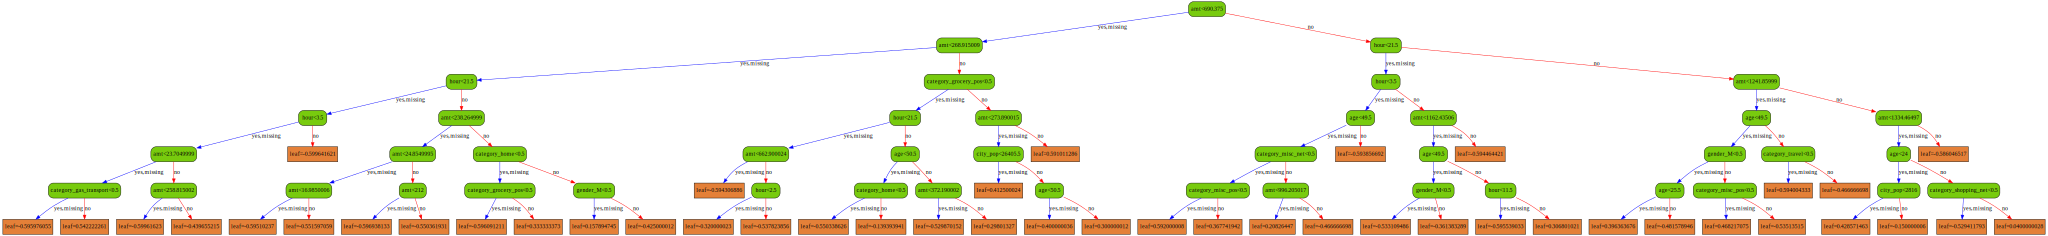

In [17]:
import graphviz
bst= clf_xgb.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type= importance_type))
    
    
node_params= {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'
             }

leaf_params= {'shape': 'box',
              'style': 'filled',
              'fillcolor': '#e48038'}

# NOTE: num_trees is NOT the number of trees to plot, but the specific tree that we are going to plot
# The default value is 0, but let's set it just to show it since it is counter-intuitive.
# xgb.to_graphviz(xgb_clf, num_trees= 0, size= "10, 10")

xgb.to_graphviz(clf_xgb, num_trees= 0, size= "10, 10",
                condition_node_params= node_params,
                leaf_node_params= leaf_params)

In [20]:
graph_data=xgb.to_graphviz(clf_xgb,num_trees=0, size="10,10",
                          condition_node_params=node_params,
                          leaf_node_params=leaf_params)
graph_data.view(filename='xgboost_tree_customer_churn')

'xgboost_tree_customer_churn.pdf'